In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
# Loading the data, converting it to csv and quickly inspecting it
raw_data = pd.read_parquet('data/yellow_tripdata_2024-12.parquet')
#raw_data.to_csv('data/raw_data.csv', index=False)
raw_data.to_csv()
raw_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,1.0,N,158,42,1,37.3,1.0,0.5,8.46,0.00,1.0,50.76,2.5,0.00
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00


In [5]:
print(raw_data.columns)
raw_data.describe()

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.668371e+06,3668371,3668371,3.342080e+06,3.668371e+06,3.342080e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.342080e+06,3.342080e+06
mean,1.774713e+00,2024-12-15 07:08:54.224627,2024-12-15 07:27:35.844428,1.362442e+00,5.087801e+00,2.328345e+00,1.648840e+02,1.637911e+02,1.133466e+00,1.966129e+01,1.355909e+00,4.746317e-01,3.459468e+00,5.569900e-01,9.515708e-01,2.832041e+01,2.221417e+00,1.281910e-01
min,1.000000e+00,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.750000e+02,-9.250000e+00,-5.000000e-01,-8.000000e+01,-7.038000e+01,-1.000000e+00,-9.510000e+02,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2024-12-08 00:30:19,2024-12-08 00:46:27.500000,1.000000e+00,9.700000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2024-12-14 16:33:04,2024-12-14 16:54:20,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.420000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.166000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-12-21 13:15:27,2024-12-21 13:31:43,1.000000e+00,3.250000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.392000e+01,2.500000e+00,5.000000e-01,4.480000e+00,0.000000e+00,1.000000e+00,3.210000e+01,2.500000e+00,0.000000e+00
max,7.000000e+00,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,3.288276e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.033100e+03,1.425000e+01,1.050000e+01,4.710000e+02,1.201500e+02,1.000000e+00,3.037100e+03,2.500000e+00,1.750000e+00
std,4.226947e-01,NaN,NaN,8.233151e-01,4.728321e+02,1.093203e+01,6.434142e+01,6.958441e+01,6.746053e-01,1.981889e+01,1.799476e+00,1.453362e-01,4.180591e+00,2.247470e+00,2.893107e-01,2.464529e+01,9.137386e-01,4.758542e-01


In [6]:
# First we will drop a number of columns that are irrelevant for our analysis
irrelevant_columns = ['VendorID', 'store_and_fwd_flag', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'total_amount']
data = raw_data.drop(columns=irrelevant_columns)

In [ ]:
# Now we check for NaN values
print(data.isnull().sum())

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          326291
trip_distance                 0
RatecodeID               326291
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
tip_amount                    0
tolls_amount                  0
dtype: int64


In [8]:
# There are quite some rows with NaN values, however given the size of the dataset we can afford to drop them
data = data.dropna()
data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount
count,3342080,3342080,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06
mean,2024-12-15 06:14:51.174303,2024-12-15 06:33:29.502092,1.362442e+00,3.302807e+00,2.328345e+00,1.658721e+02,1.647834e+02,1.244127e+00,1.941971e+01,1.481071e+00,3.673157e+00,5.751583e-01
min,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.750000e+02,-9.250000e+00,-8.000000e+01,-7.038000e+01
25%,2024-12-07 22:47:36.750000,2024-12-07 23:06:56,1.000000e+00,9.500000e-01,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2024-12-14 15:19:25,2024-12-14 15:38:27,1.000000e+00,1.630000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,2.900000e+00,0.000000e+00
75%,2024-12-21 13:25:05.250000,2024-12-21 13:41:08,1.000000e+00,3.170000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.260000e+01,2.500000e+00,4.650000e+00,0.000000e+00
max,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,7.176153e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.033100e+03,1.425000e+01,4.710000e+02,1.201500e+02
std,NaN,NaN,8.233151e-01,3.965839e+01,1.093203e+01,6.337386e+01,6.935388e+01,6.015367e-01,2.023645e+01,1.830330e+00,4.226726e+00,2.285921e+00


In [9]:
# We also want to apply one hot encoding to the categorical variables
categorical_columns = ['RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID']
ohe_encoder = OneHotEncoder(sparse_output=False)
encoded_features = ohe_encoder.fit_transform(data[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe_encoder.get_feature_names_out())
data = data.drop(columns=categorical_columns)
data = pd.concat([data, encoded_features_df], axis=1)
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,RatecodeID_1.0,RatecodeID_2.0,...,DOLocationID_256,DOLocationID_257,DOLocationID_258,DOLocationID_259,DOLocationID_260,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265
0,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,38.0,6.0,4.72,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,37.3,1.0,8.46,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,70.0,0.0,0.00,6.94,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,15.6,1.0,4.12,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,26.8,1.0,5.00,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# We will now convert the pickup and dropoff times to more useful features such as:
# trip duration, pickup hour, pickup day and create new features 'peak_times' to indicate 
# if the trip was during peak hours and 'weekend' to indicate if the trip was during the weekend
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60 # (in minutes)
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['tpep_pickup_datetime'].dt.dayofweek
data['peak_times'] = data['pickup_hour'].apply(lambda x: 1 if (x >= 7 and x <= 9) or (x >= 16 and x <= 19) else 0)
data['weekend'] = data['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)

In [4]:
# Given that we created a large number of dummy columns throught the one hot encoding we will make
# a list of columns names, excluding the dummy ones, for easier further inspection

all_columns = data.columns.tolist()
categorical_columns = ['RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID'] # Again since kernel sometimes crashes

# Filter out one hot encoded columns
not_hot_columns = [col for col in all_columns if not any(cat_col in col for cat_col in categorical_columns)]
print(not_hot_columns)
data[not_hot_columns].describe()

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'trip_duration', 'pickup_hour', 'pickup_day', 'peak_times', 'weekend']


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,trip_duration,pickup_hour,pickup_day,peak_times,weekend
count,3342080,3342080,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06
mean,2024-12-15 06:14:51.174303,2024-12-15 06:33:29.502092,1.362442e+00,3.302807e+00,1.941971e+01,1.481071e+00,3.673157e+00,5.751583e-01,1.863880e+01,1.445915e+01,2.973610e+00,3.654167e-01,2.818329e-01
min,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,-9.750000e+02,-9.250000e+00,-8.000000e+01,-7.038000e+01,-4.190000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024-12-07 22:47:36.750000,2024-12-07 23:06:56,1.000000e+00,9.500000e-01,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,7.800000e+00,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,2024-12-14 15:19:25,2024-12-14 15:38:27,1.000000e+00,1.630000e+00,1.350000e+01,1.000000e+00,2.900000e+00,0.000000e+00,1.346667e+01,1.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00
75%,2024-12-21 13:25:05.250000,2024-12-21 13:41:08,1.000000e+00,3.170000e+00,2.260000e+01,2.500000e+00,4.650000e+00,0.000000e+00,2.281667e+01,1.900000e+01,5.000000e+00,1.000000e+00,1.000000e+00
max,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,7.176153e+04,3.033100e+03,1.425000e+01,4.710000e+02,1.201500e+02,5.992250e+03,2.300000e+01,6.000000e+00,1.000000e+00,1.000000e+00
std,NaN,NaN,8.233151e-01,3.965839e+01,2.023645e+01,1.830330e+00,4.226726e+00,2.285921e+00,3.521437e+01,5.685694e+00,2.009820e+00,4.815469e-01,4.498924e-01


In [ ]:
# We see that the minimum fare_amount is negative, which is impossible, we'll start by removing
# all rows which have a fare_amount of less than 1 (which is our assumption regarding minimum fare)

data = data[data['fare_amount'] >= 1]
data[not_hot_columns].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,RatecodeID_1.0,RatecodeID_2.0,...,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,trip_duration,pickup_hour,pickup_day,peak_times,weekend
count,3270983,3270983,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,...,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06,3.270983e+06
mean,2024-12-15 05:30:17.824629,2024-12-15 05:48:59.229833,1.360072e+00,3.298426e+00,2.033321e+01,1.534756e+00,3.750632e+00,6.024737e-01,9.367771e-01,3.402249e-02,...,5.037935e-03,1.625811e-02,2.151066e-02,4.107939e-03,4.722434e-03,1.869009e+01,1.445791e+01,2.971623e+00,3.657552e-01,2.812619e-01
min,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.190000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024-12-07 22:29:47,2024-12-07 22:48:21,1.000000e+00,9.600000e-01,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.866667e+00,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,2024-12-14 14:45:11,2024-12-14 15:03:07,1.000000e+00,1.640000e+00,1.420000e+01,1.000000e+00,2.950000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.351667e+01,1.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00
75%,2024-12-21 12:32:55.500000,2024-12-21 12:47:48.500000,1.000000e+00,3.160000e+00,2.330000e+01,2.500000e+00,4.720000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.285000e+01,1.900000e+01,5.000000e+00,1.000000e+00,1.000000e+00
max,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,7.176153e+04,3.033100e+03,1.425000e+01,4.710000e+02,1.201500e+02,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.992250e+03,2.300000e+01,6.000000e+00,1.000000e+00,1.000000e+00
std,NaN,NaN,8.223343e-01,4.007867e+01,1.901185e+01,1.800326e+00,4.227950e+00,2.263529e+00,2.433635e-01,1.812870e-01,...,7.079941e-02,1.264666e-01,1.450791e-01,6.396144e-02,6.855752e-02,3.543791e+01,5.678802e+00,2.008775e+00,4.816414e-01,4.496151e-01


In [7]:
# We see that the minimum trip_duration is negative, which is impossible, we'll start by removing
# all rows which have a trip_duration of less than 1 minute (which is our assumption regarding minimum trip_duration)

data = data[data['trip_duration'] >= 1]
data[not_hot_columns].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,trip_duration,pickup_hour,pickup_day,peak_times,weekend
count,3233540,3233540,3.233540e+06,3.233540e+06,3.233540e+06,3.233540e+06,3.233540e+06,3.233540e+06,3.233540e+06,3.233540e+06,3.233540e+06,3.233540e+06,3.233540e+06
mean,2024-12-15 05:18:49.198569,2024-12-15 05:37:43.391479,1.358401e+00,3.335478e+00,2.014040e+01,1.542843e+00,3.744197e+00,6.046845e-01,1.890322e+01,1.447212e+01,2.970129e+00,3.661189e-01,2.808046e-01
min,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024-12-07 22:25:29,2024-12-07 22:44:14,1.000000e+00,9.900000e-01,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,8.033333e+00,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,2024-12-14 14:36:07,2024-12-14 14:55:07.500000,1.000000e+00,1.660000e+00,1.420000e+01,1.000000e+00,3.000000e+00,0.000000e+00,1.366667e+01,1.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00
75%,2024-12-21 12:15:46.250000,2024-12-21 12:30:54.250000,1.000000e+00,3.200000e+00,2.330000e+01,2.500000e+00,4.710000e+00,0.000000e+00,2.300000e+01,1.900000e+01,5.000000e+00,1.000000e+00,1.000000e+00
max,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,7.176153e+04,3.033100e+03,1.425000e+01,4.710000e+02,1.201500e+02,5.992250e+03,2.300000e+01,6.000000e+00,1.000000e+00,1.000000e+00
std,NaN,NaN,8.199250e-01,4.030846e+01,1.830620e+01,1.801488e+00,4.159478e+00,2.261009e+00,3.558675e+01,5.669262e+00,2.007903e+00,4.817426e-01,4.493923e-01


In [2]:
# In case kernel has crashed again, load the data here so you can skip all previous cells
data = pd.read_parquet('data/cleaned_data_v1.parquet')
data.to_csv()

# Again since kernel sometimes crashes
all_columns = data.columns.tolist()
categorical_columns = ['RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID'] 
not_hot_columns = [col for col in all_columns if not any(cat_col in col for cat_col in categorical_columns)]

data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,RatecodeID_1.0,RatecodeID_2.0,...,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,trip_duration,pickup_hour,pickup_day,peak_times,weekend
0,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,38.0,6.0,4.72,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.750000,0,6,0,1
1,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,37.3,1.0,8.46,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.183333,23,5,0,1
2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,70.0,0.0,0.00,6.94,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,34.183333,0,6,0,1
3,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,15.6,1.0,4.12,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.000000,0,6,0,1
4,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,26.8,1.0,5.00,0.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.200000,0,6,0,1


In [3]:
# Converting all float64 columns to float32 to save memory
float64_cols = data.select_dtypes(include='float64')
print(f"Number of float64 columns: {float64_cols.shape[1]}")
print("Float64 columns:", float64_cols.columns.tolist())
print(f"Memory usage before: {data.memory_usage(deep=True).sum() / 1e6} MB")

Number of float64 columns: 534
Float64 columns: ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'RatecodeID_1.0', 'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0', 'RatecodeID_99.0', 'payment_type_1', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'PULocationID_1', 'PULocationID_2', 'PULocationID_3', 'PULocationID_4', 'PULocationID_6', 'PULocationID_7', 'PULocationID_8', 'PULocationID_9', 'PULocationID_10', 'PULocationID_11', 'PULocationID_12', 'PULocationID_13', 'PULocationID_14', 'PULocationID_15', 'PULocationID_16', 'PULocationID_17', 'PULocationID_18', 'PULocationID_19', 'PULocationID_20', 'PULocationID_21', 'PULocationID_22', 'PULocationID_23', 'PULocationID_24', 'PULocationID_25', 'PULocationID_26', 'PULocationID_27', 'PULocationID_28', 'PULocationID_29', 'PULocationID_30', 'PULocationID_31', 'PULocationID_32', 'PULocationID_33', 'PULocationID_34', 'PULocationID_35', 'PULocationID_36', 'PULo

In [4]:
# Converting all float64 columns to float32 to save memory
data = data.astype({col: 'float32' for col in data.select_dtypes(include='float64').columns})

In [5]:
# Converting all float64 columns to float32 to save memory
float32_cols = data.select_dtypes(include='float32')
print(f"Number of float64 columns: {float32_cols.shape[1]}")
print("Float64 columns:", float32_cols.columns.tolist())
print(f"Memory usage before: {data.memory_usage(deep=True).sum() / 1e6} MB")

Number of float64 columns: 534
Float64 columns: ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'RatecodeID_1.0', 'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0', 'RatecodeID_99.0', 'payment_type_1', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'PULocationID_1', 'PULocationID_2', 'PULocationID_3', 'PULocationID_4', 'PULocationID_6', 'PULocationID_7', 'PULocationID_8', 'PULocationID_9', 'PULocationID_10', 'PULocationID_11', 'PULocationID_12', 'PULocationID_13', 'PULocationID_14', 'PULocationID_15', 'PULocationID_16', 'PULocationID_17', 'PULocationID_18', 'PULocationID_19', 'PULocationID_20', 'PULocationID_21', 'PULocationID_22', 'PULocationID_23', 'PULocationID_24', 'PULocationID_25', 'PULocationID_26', 'PULocationID_27', 'PULocationID_28', 'PULocationID_29', 'PULocationID_30', 'PULocationID_31', 'PULocationID_32', 'PULocationID_33', 'PULocationID_34', 'PULocationID_35', 'PULocationID_36', 'PULo

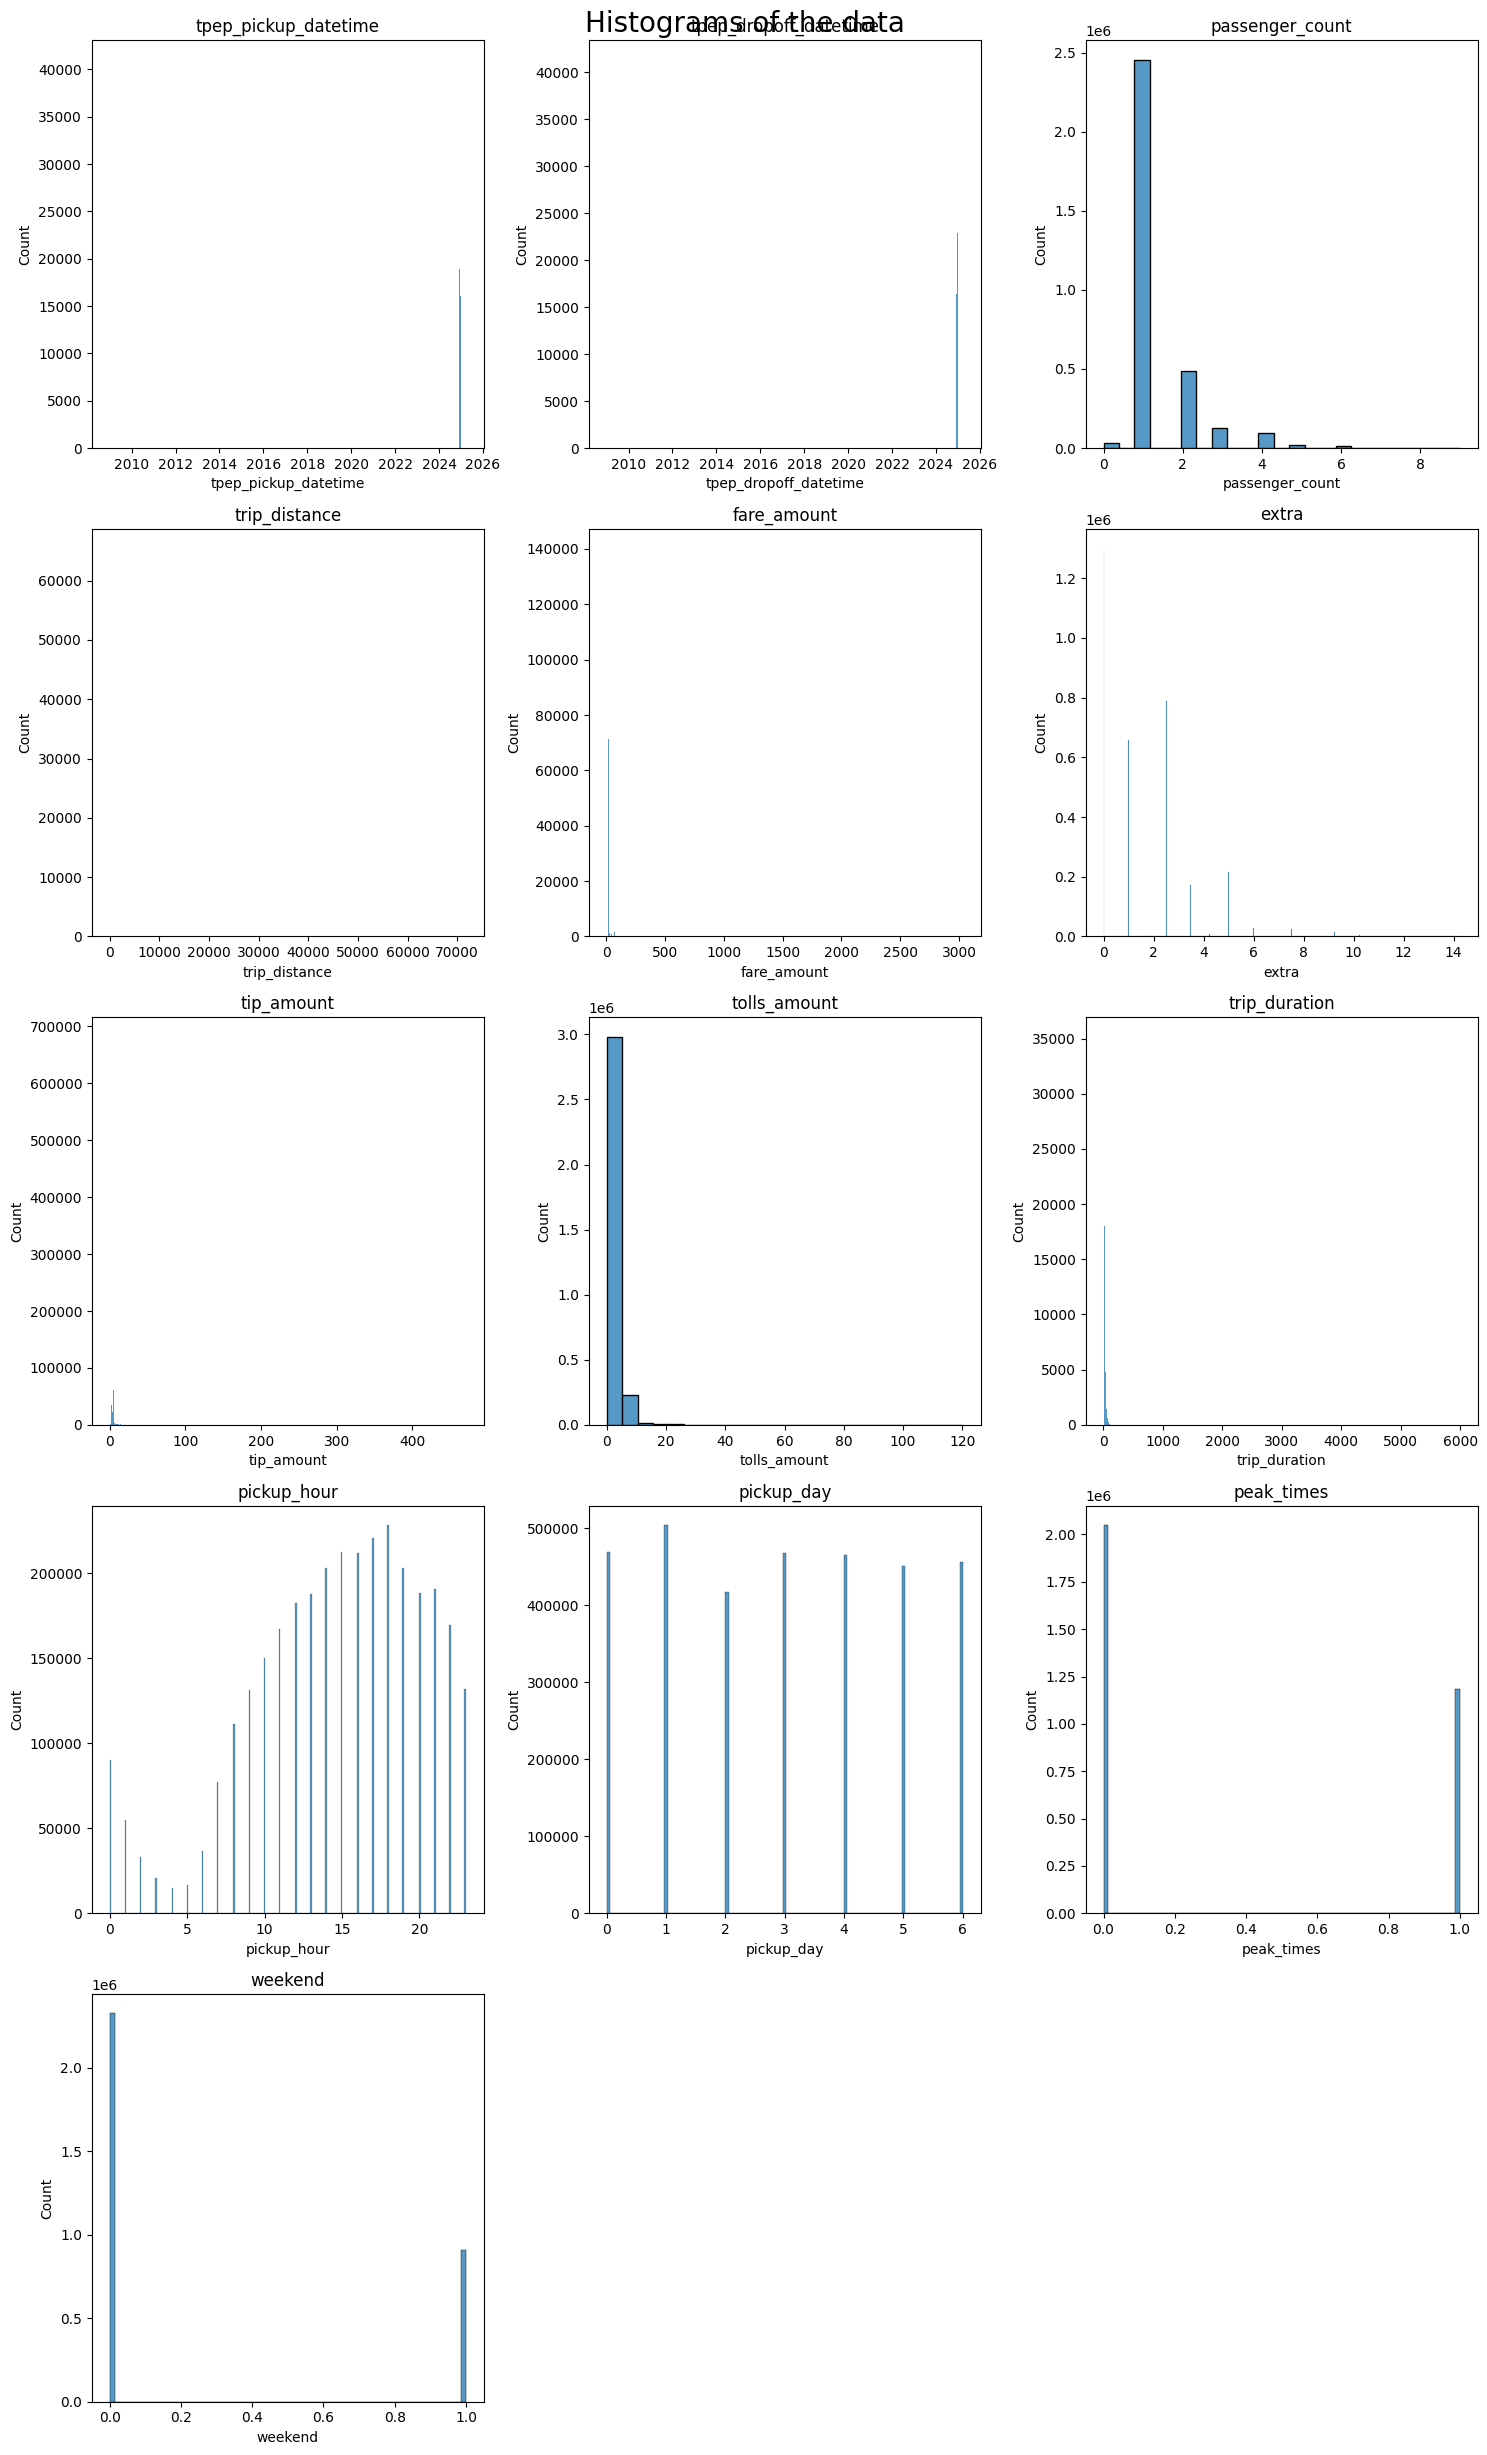

In [7]:
# Now we visualise the data in a number of histograms to get an even better understanding
fig, axes = plt.subplots(5,3, figsize=(15,25))
fig.suptitle('Histograms of the data', fontsize=20)

axes = axes.flatten()

for i,col in enumerate(not_hot_columns):
    sns.histplot(data[col], ax=axes[i], kde=False)
    axes[i].set_title(col)

# Removing the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

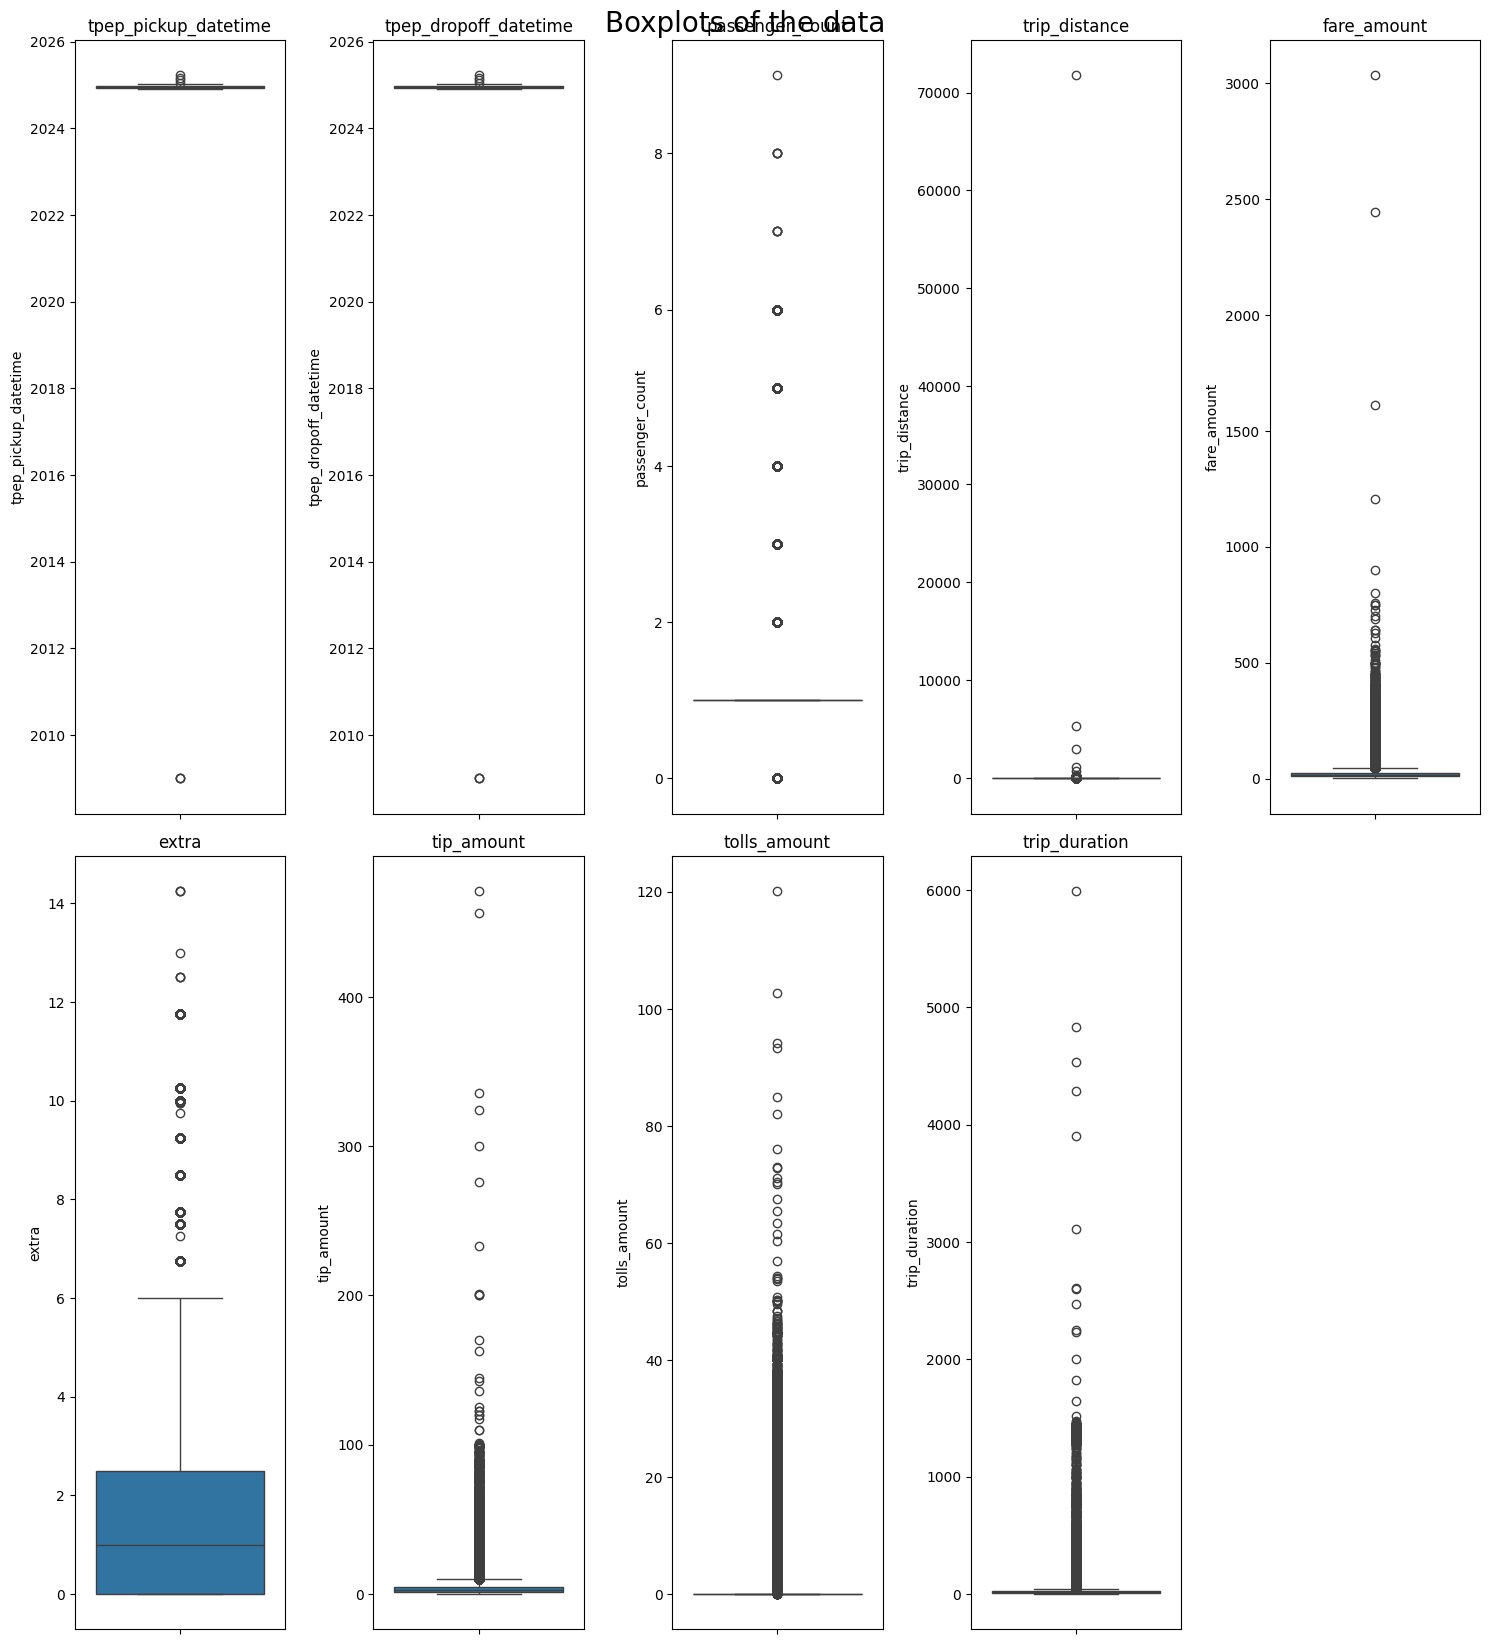

In [6]:
# The histograms already suggest a substantial amount of outliers in the data,
# to get an additional view of the outliers, we'll create boxplots for the same columns
fig, axes = plt.subplots(3,5, figsize=(15,25))
fig.suptitle('Boxplots of the data', fontsize=20)

axes = axes.flatten()

for i,col in enumerate(not_hot_columns[:-4]): # Excluding the last 4 time related variables as they are 'around the clock' variables thus not susceptible to outliers
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(col)

# Removing the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
# Given the large amount of outliers in the data multiple variables, we will deal with them using
# the IQR method and since our dataset is very large we will remove outliers without replacing them.
# However, before applying the IQR method, we will remove extreme outliers per variable,
# as they would influene the IQR method too much

# First we quickly drop the obvious weird result from a year before 2010
data = data[data['tpep_pickup_datetime'].dt.year >= 2010]

# We remove the 70000+ miles trip
data = data[data['trip_distance'] < 70000]

# We remove 1440+ minute trips, as no one will ever spend more then 24 hours in a taxi
data = data[data['trip_duration'] <= 1440]


In [7]:
# Now we remove the other outliers using the IQR method for all numerical columns (note that we're not 
# using the exact quantiles, as 0.1 and 0.9 performed better)
Q1 = data[not_hot_columns[3:-4]].quantile(0.1) # Excluding the first 2 and last 4 columns as they are not numerical
Q3 = data[not_hot_columns[3:-4]].quantile(0.9) # Also excluding passenger count as 9 is a valid number of passengers
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows that are outliers and create a new df without them
outliers = ((data[not_hot_columns[3:-4]] < lower_bound) | (data[not_hot_columns[3:-4]] > upper_bound))
data_no_outliers = data[~outliers.any(axis=1)]


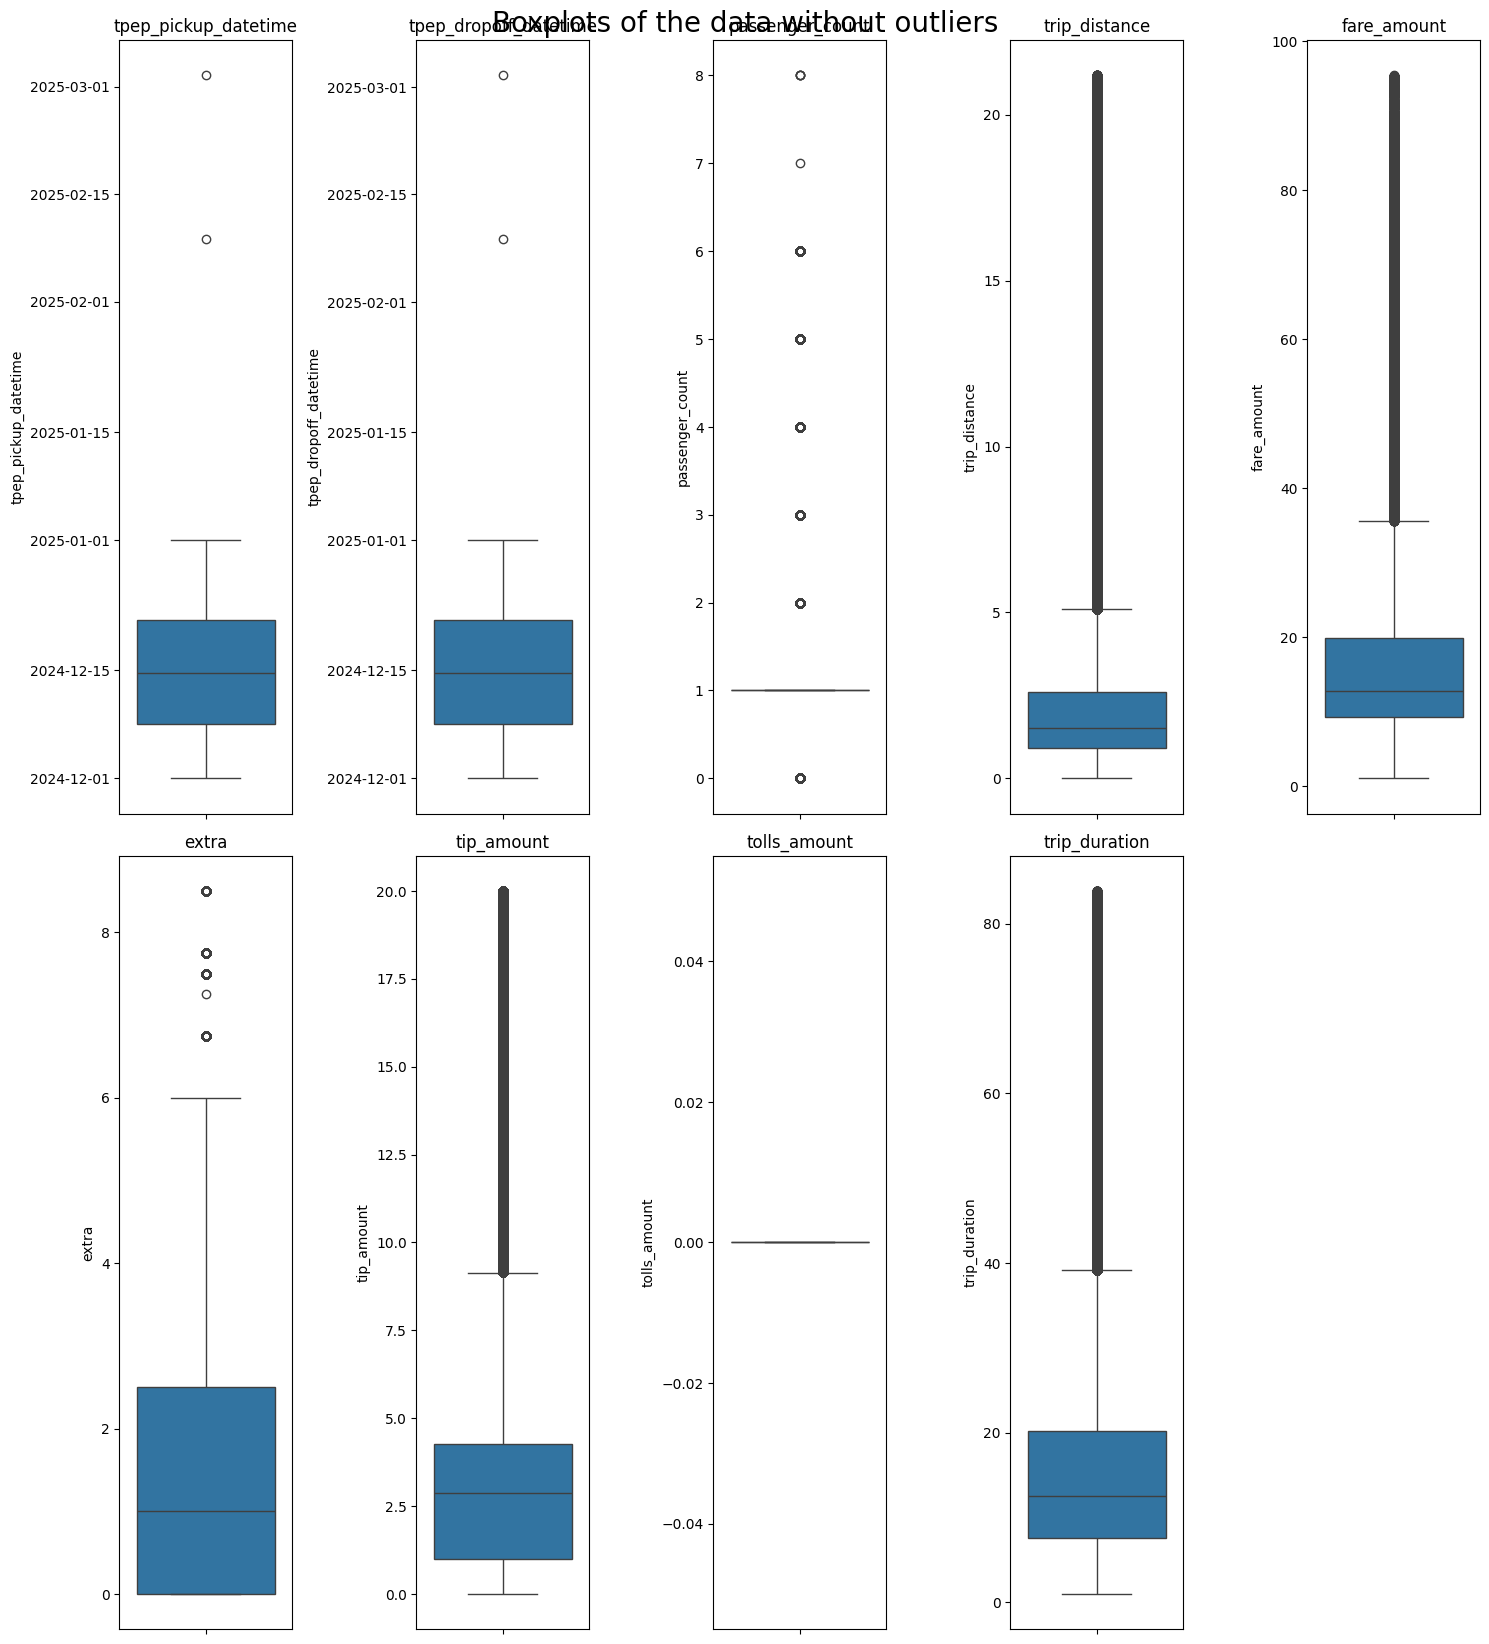

In [5]:
# Now we check the boxplot again
fig, axes = plt.subplots(3,5, figsize=(15,25))
fig.suptitle('Boxplots of the data without outliers', fontsize=20)

axes = axes.flatten()

for i,col in enumerate(not_hot_columns[:-4]): # Excluding the last 4 time related variables as they are 'around the clock' variables thus not susceptible to outliers
    sns.boxplot(data_no_outliers[col], ax=axes[i])
    axes[i].set_title(col)

# Removing the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

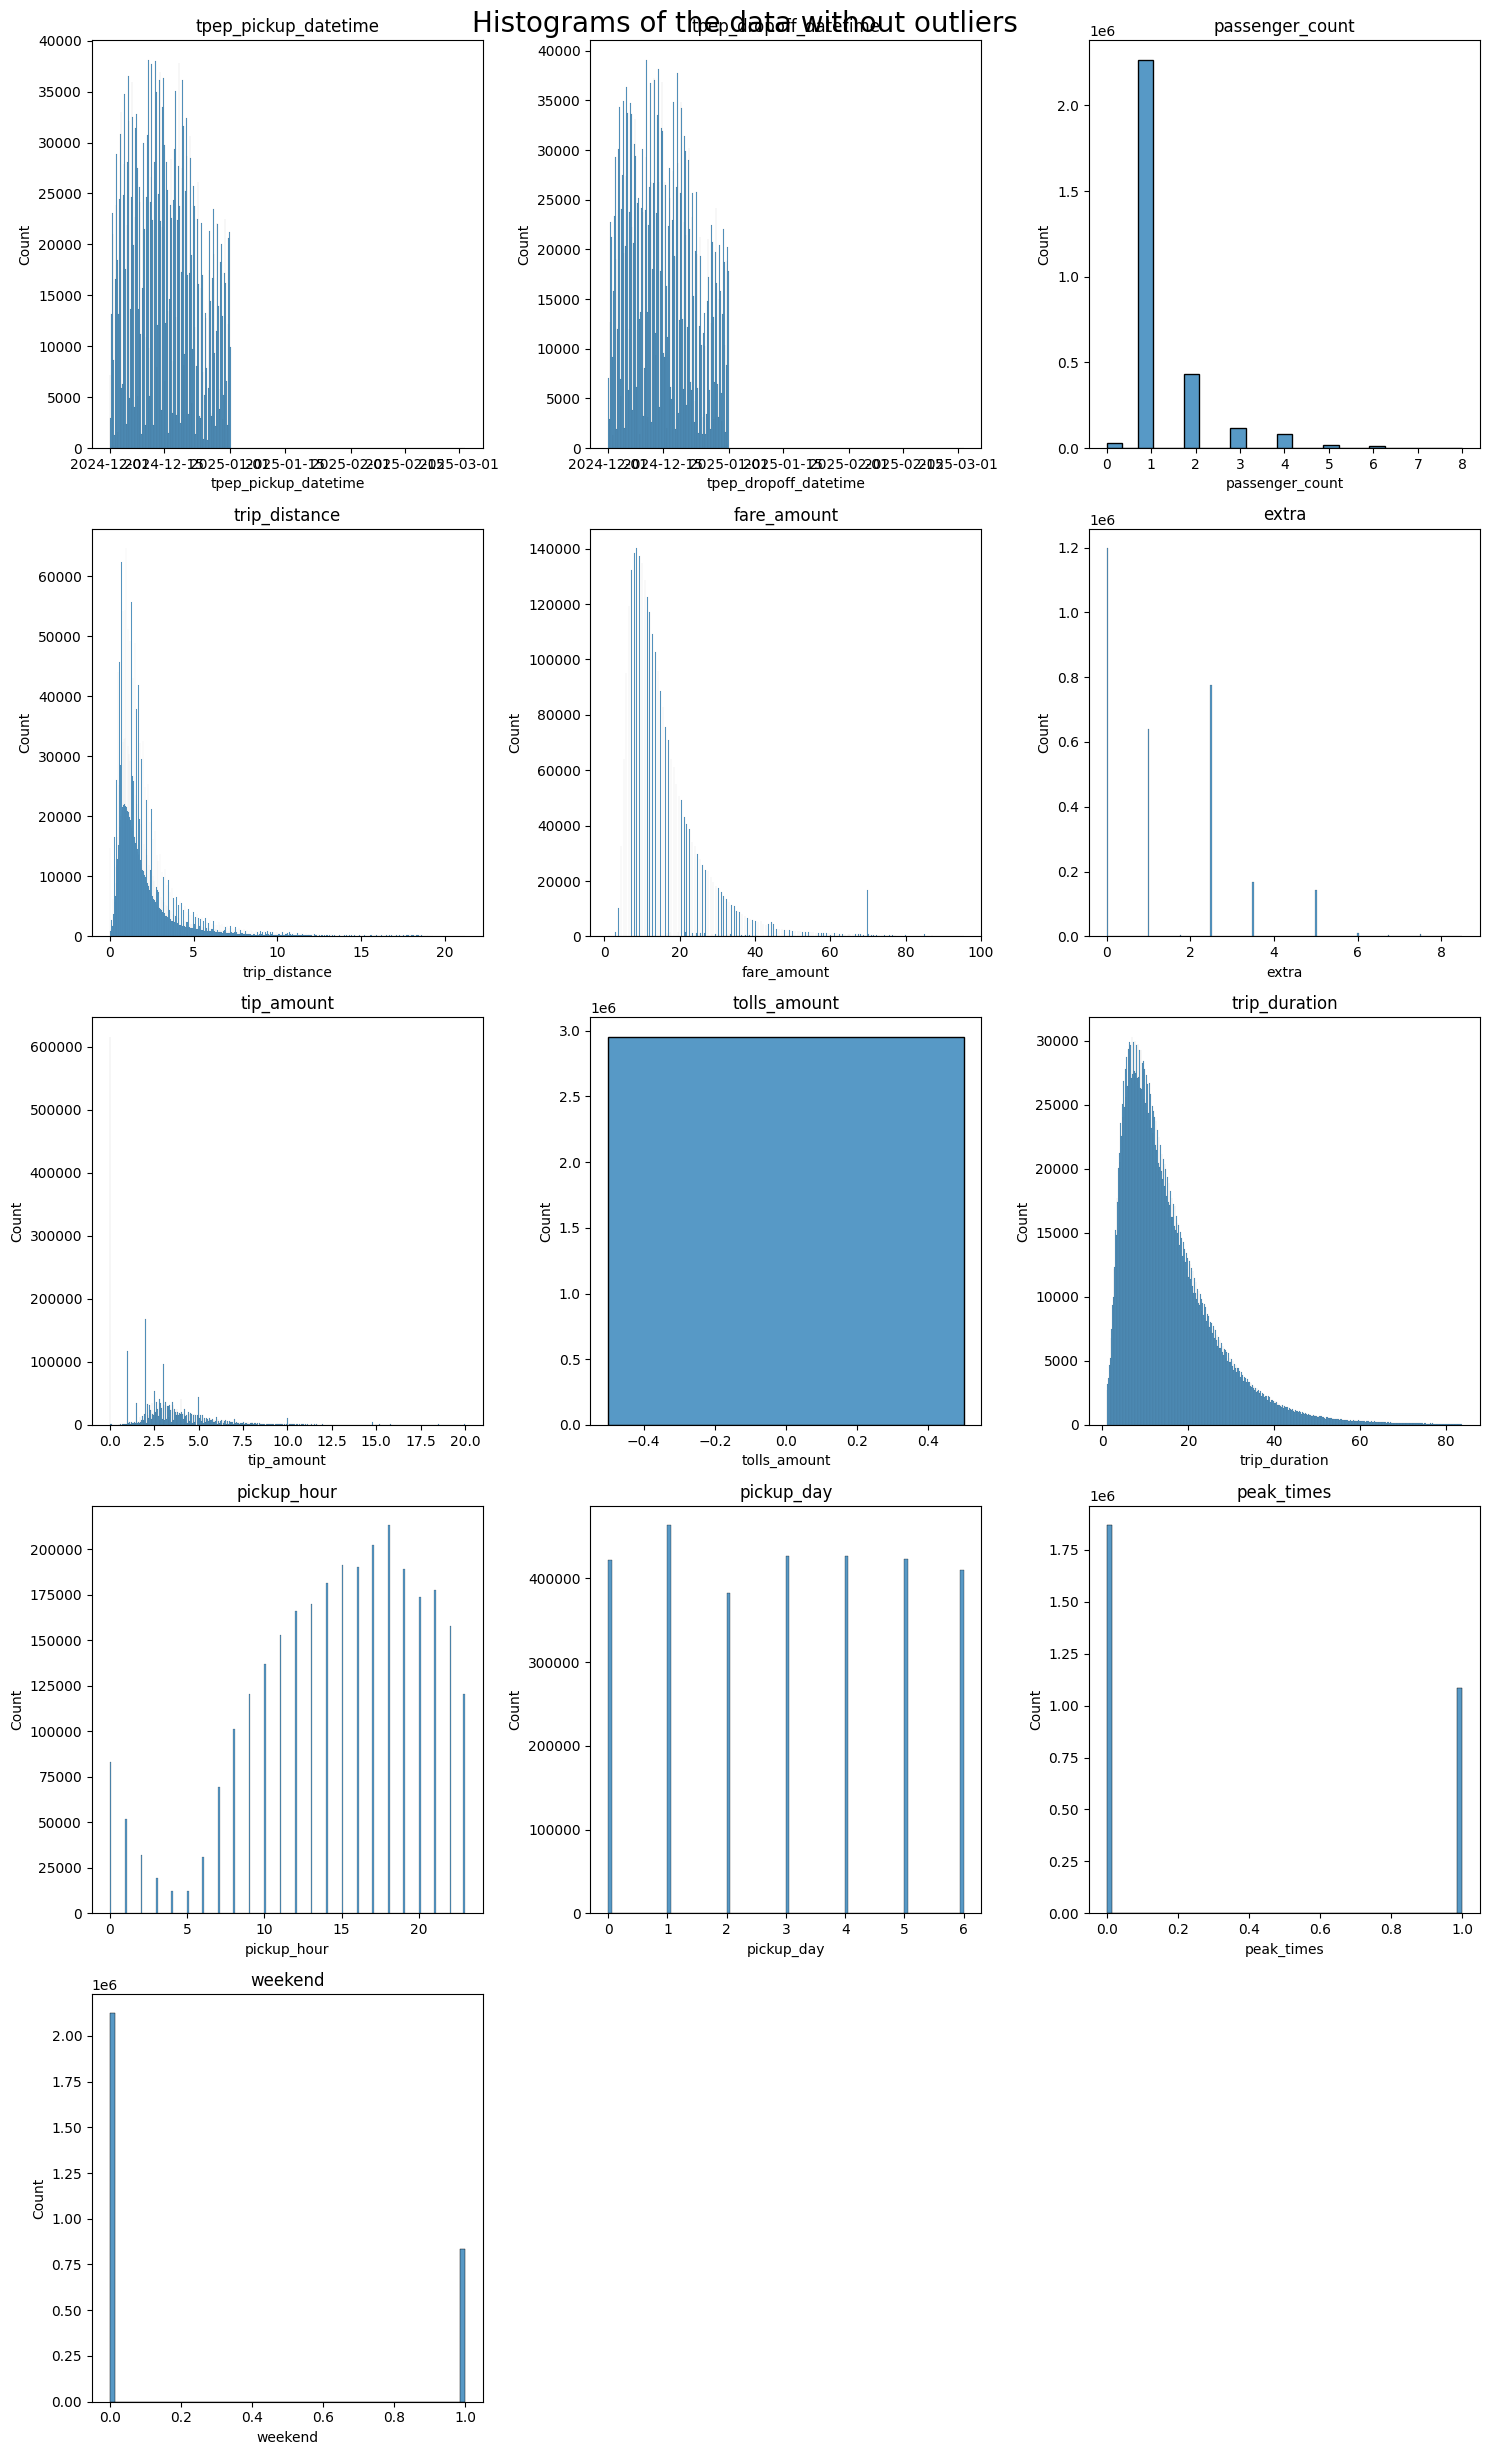

In [12]:
# We can also check the histograms again
fig, axes = plt.subplots(5,3, figsize=(15,25))
fig.suptitle('Histograms of the data without outliers', fontsize=20)

axes = axes.flatten()

for i,col in enumerate(not_hot_columns):
    sns.histplot(data_no_outliers[col], ax=axes[i], kde=False)
    axes[i].set_title(col)

# Removing the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

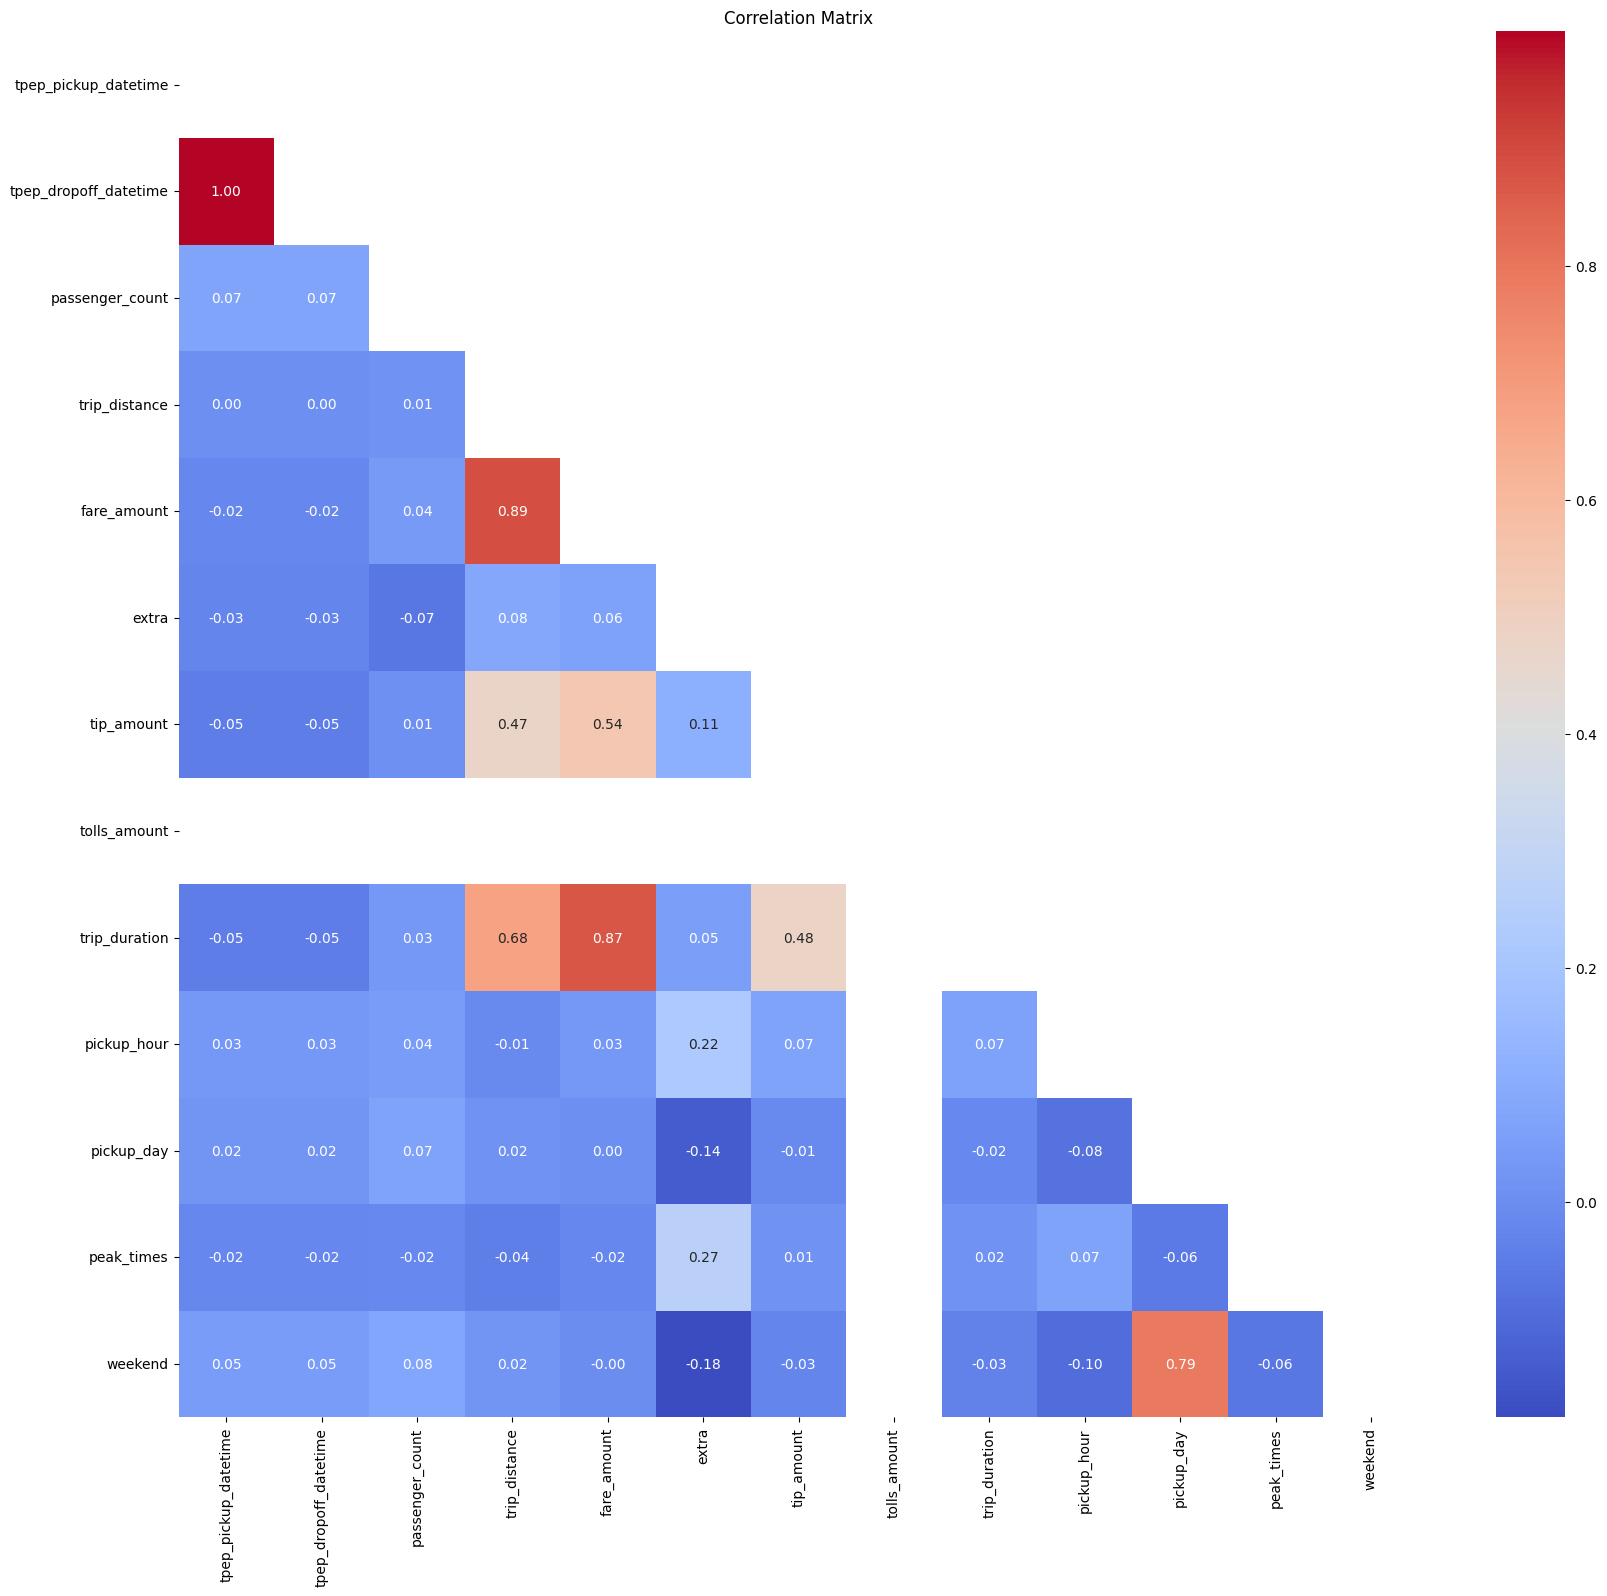

In [23]:
# We now create a correlation matrix to see if there are any strong correlations between the features
correlation_matrix = data_no_outliers[not_hot_columns].corr()

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# For the algorithms to work properly we will now scale the data (except of course for the hot encoded columns)
scaler = MinMaxScaler()

scaled_data_no_outliers = scaler.fit_transform(data_no_outliers[not_hot_columns[2:]])
scaled_data_no_outliers = pd.DataFrame(scaled_data_no_outliers, columns=not_hot_columns[2:])

In [18]:
# Replace the columns in data_no_outliers with the scaled values
data_no_outliers[not_hot_columns[2:]] = scaled_data_no_outliers

/var/folders/mz/j0q1_7_x2f59p13bv_c81xhc0000gn/T/ipykernel_82424/3263854199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers[not_hot_columns[2:]] = scaled_data_no_outliers


In [21]:
# Ff saven want duurde fk lang om alles te runnen en crashte nog wel eens
data_no_outliers.to_parquet('data/final_data_cleaned_scaled.parquet', engine='pyarrow', index=False)

In [3]:
# In case kernel has crashed again, load the data here so you can skip all previous cells
final_data = pd.read_parquet('data/final_data_cleaned_scaled.parquet')
final_data.to_csv()

# Again since kernel sometimes crashes
all_columns = final_data.columns.tolist()
categorical_columns = ['RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID'] 
not_hot_columns = [col for col in all_columns if not any(cat_col in col for cat_col in categorical_columns)]

final_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,RatecodeID_1.0,RatecodeID_2.0,...,DOLocationID_261,DOLocationID_262,DOLocationID_263,DOLocationID_264,DOLocationID_265,trip_duration,pickup_hour,pickup_day,peak_times,weekend
0,2024-12-01 00:12:27,2024-12-01 00:31:12,0.125,0.460595,0.391783,0.705882,0.236,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.214286,0.0,1.000000,0.0,1.0
1,2024-11-30 23:56:04,2024-12-01 00:28:15,0.125,0.359604,0.384371,0.117647,0.423,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.376459,1.0,0.833333,0.0,1.0
2,2024-12-01 00:18:16,2024-12-01 00:33:16,0.125,0.238320,0.273189,0.117647,0.250,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.255936,0.0,1.000000,0.0,1.0
3,2024-12-01 00:56:13,2024-12-01 01:18:25,0.125,0.202926,0.206480,0.411765,0.255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.182093,0.0,1.000000,0.0,1.0
4,2024-12-01 00:21:17,2024-12-01 00:37:22,0.125,0.361491,0.362135,0.117647,0.402,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.303823,0.0,1.000000,0.0,1.0


In [7]:
# DROPPING LOCATIONID COLUMNS FROM FINAL DATA
FINAL_final_data = final_data.drop(columns=final_data.filter(like="LocationID").columns)
FINAL_final_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,RatecodeID_1.0,RatecodeID_2.0,...,RatecodeID_99.0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,trip_duration,pickup_hour,pickup_day,peak_times,weekend
0,2024-12-01 00:12:27,2024-12-01 00:31:12,0.125,0.460595,0.391783,0.705882,0.236,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.214286,0.0,1.000000,0.0,1.0
1,2024-11-30 23:56:04,2024-12-01 00:28:15,0.125,0.359604,0.384371,0.117647,0.423,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.376459,1.0,0.833333,0.0,1.0
2,2024-12-01 00:18:16,2024-12-01 00:33:16,0.125,0.238320,0.273189,0.117647,0.250,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.255936,0.0,1.000000,0.0,1.0
3,2024-12-01 00:56:13,2024-12-01 01:18:25,0.125,0.202926,0.206480,0.411765,0.255,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.182093,0.0,1.000000,0.0,1.0
4,2024-12-01 00:21:17,2024-12-01 00:37:22,0.125,0.361491,0.362135,0.117647,0.402,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.303823,0.0,1.000000,0.0,1.0


In [8]:
# Ff saven want duurde fk lang om alles te runnen en crashte nog wel eens
FINAL_final_data.to_parquet('data/FINAL_final_data_cleaned_scaled.parquet', engine='pyarrow', index=False)

In [ ]:
# FINAL DATA WIHTOUT LOCATIONID COLUMNS

# In case kernel has crashed again, load the data here so you can skip all previous cells
FINAL_final_data = pd.read_parquet('data/FINAL_final_data_cleaned_scaled.parquet')
FINAL_final_data.to_csv()

# Again since kernel sometimes crashes
all_columns = FINAL_final_data.columns.tolist()
categorical_columns = ['RatecodeID', 'payment_type'] 
not_hot_columns = [col for col in all_columns if not any(cat_col in col for cat_col in categorical_columns)]

final_data.head()

In [24]:
# Lastly we set create two new dataframes for the features and target variable
X = final_data['fare_amount']
y = final_data.drop(columns=['fare_amount']) 

In [25]:
# Creating train test split
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.2, random_state=42)